<a href="https://colab.research.google.com/github/CReis93/2022_ML_Earth_Env_Sci/blob/main/Copie_de_S1_3_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

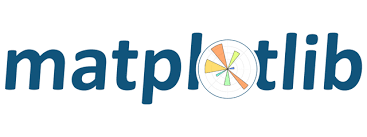

**Matlotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Website: https://matplotlib.org/

GitHub: https://github.com/matplotlib/matplotlib

In the previous notebook, we saw some basic examples of plotting and visualization in the context of learning `numpy`. In this notebook, we dive much deeper. The goal is to understand how `matplotlib` represents figures internally.

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

# Figure and Axes

The *figure* is the highest level of organization of `matplotlib` objects. If we want, we can create a figure explicitly.

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(13, 5))

<Figure size 936x360 with 0 Axes>

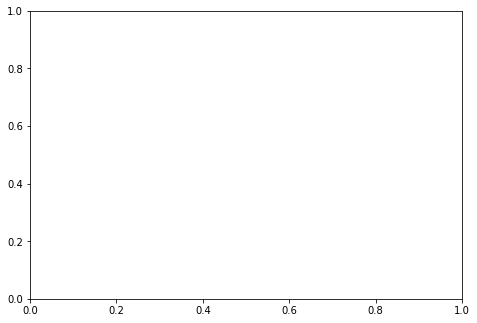

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

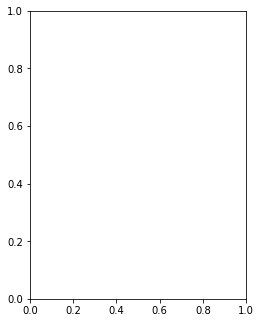

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 1])

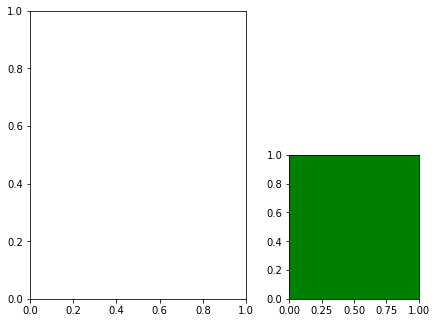

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 1])
ax2 = fig.add_axes([0.6, 0, 0.3, 0.5], facecolor='g')

# Subplots

Subplot syntax is one way to specify the creation of multiple axes.

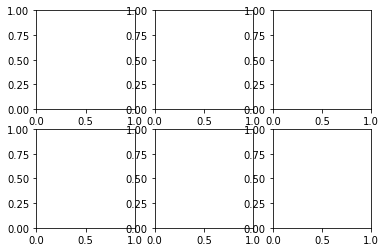

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=3)

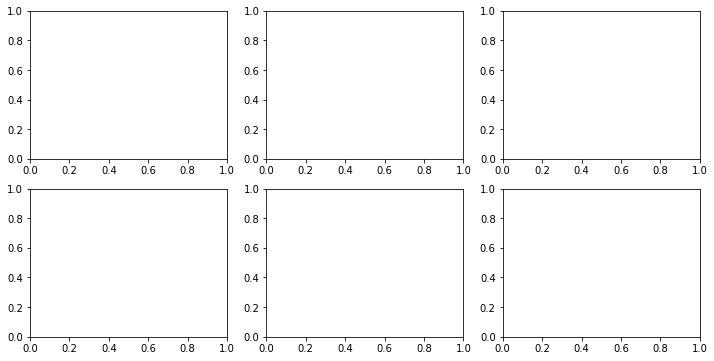

In [ ]:
fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(nrows=2, ncols=3)

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec8ac5cf90>,
      dtype=object)

There is a shorthand for doing this all at once, **which is our recommended way to create new figures!**

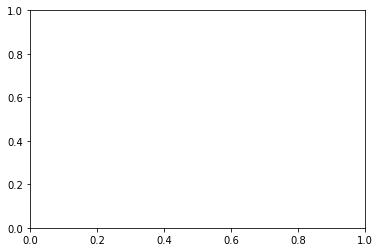

In [ ]:
fig, ax = plt.subplots()

In [ ]:
ax

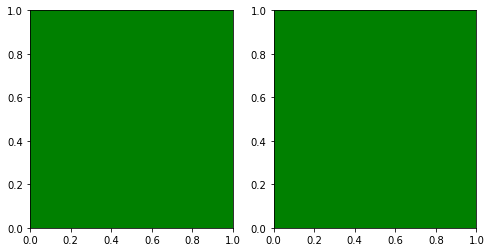

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4), subplot_kw={'facecolor': 'g'})

In [ ]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec8a479c90>,
      dtype=object)

# Drawing into Axes

All plots are drawn into axes. It is easiest to understand how matplotlib works if you use the [object-oriented](https://matplotlib.org/faq/usage_faq.html#coding-styles) style.

In [ ]:
# create some data to plot
import numpy as np
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
z = np.sin(6*x)

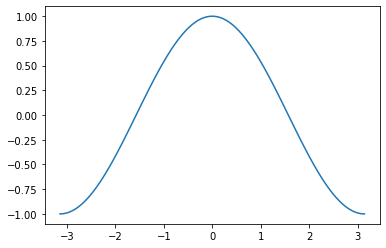

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)

This does the same thing as

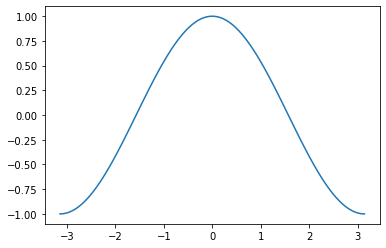

In [ ]:
plt.plot(x, y)

This starts to matter when we have multiple axes to worry about.

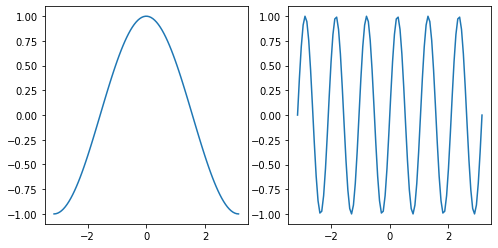

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes
ax0.plot(x, y)
ax1.plot(x, z)

# Labeling Plots

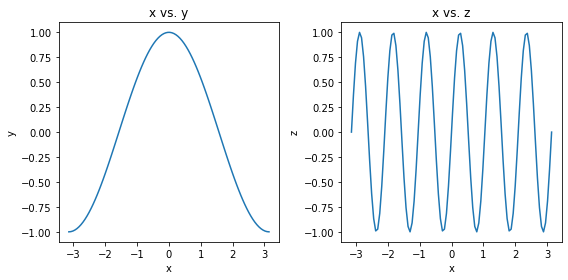

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes

ax0.plot(x, y)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('x vs. y')

ax1.plot(x, z)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_title('x vs. z')

# squeeze everything in
plt.tight_layout()

# Customizing Line Plots

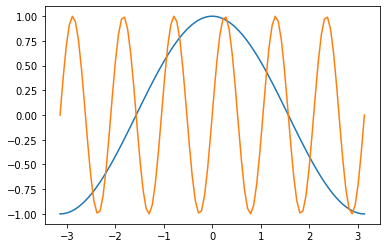

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, x, z)

It’s simple to switch axes

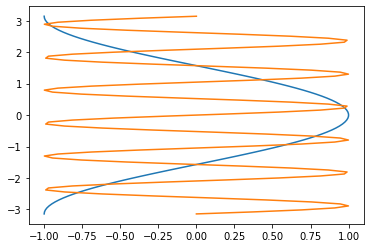

In [ ]:
fig, ax = plt.subplots()
ax.plot(y, x, z, x)

A “parametric” graph:

In [ ]:
fig, ax = plt.subplots()
ax.plot(y, z)

## Line Styles

In [ ]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)
axes[0].plot(x, y, linestyle='dashed')
axes[0].plot(x, z, linestyle='--')

axes[1].plot(x, y, linestyle='dotted')
axes[1].plot(x, z, linestyle=':')

axes[2].plot(x, y, linestyle='dashdot', linewidth=5)
axes[2].plot(x, z, linestyle='-.', linewidth=0.5)

## Colors

As described in the [colors documentation](https://matplotlib.org/2.0.2/api/colors_api.html), there are some special codes for commonly used colors:

*    b: blue
*    g: green
*    r: red
*    c: cyan
*    m: magenta
*    y: yellow
*    k: black
*    w: white

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='k')
ax.plot(x, z, color='r')

Other ways to specify colors:

In [ ]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)

# grayscale
axes[0].plot(x, y, color='0.8')
axes[0].plot(x, z, color='0.2')

# RGB tuple
axes[1].plot(x, y, color=(1, 0, 0.7))
axes[1].plot(x, z, color=(0, 0.4, 0.3))

# HTML hex code
axes[2].plot(x, y, color='#00dcba')
axes[2].plot(x, z, color='#b029ee')

There is a default color cycle built into `matplotlib`.

In [ ]:
plt.rcParams['axes.prop_cycle']

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for factor in np.linspace(0.2, 1, 11):
    ax.plot(x, factor*y)

## Markers

There are [lots of different markers](https://matplotlib.org/api/markers_api.html) availabile in matplotlib!

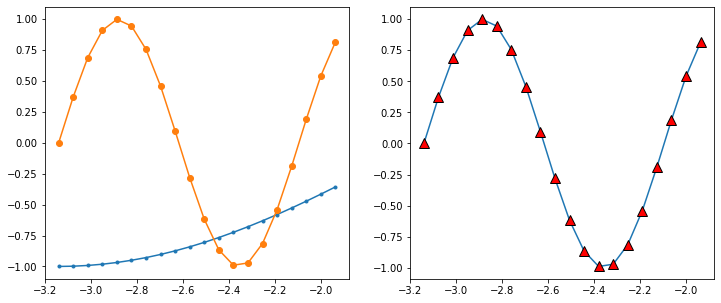

In [ ]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

axes[0].plot(x[:20], y[:20], marker='.')
axes[0].plot(x[:20], z[:20], marker='o')

axes[1].plot(x[:20], z[:20], marker='^',
             markersize=10, markerfacecolor='r',
             markeredgecolor='k')

<a name="Label"></a>
## Label, Ticks, and Gridlines

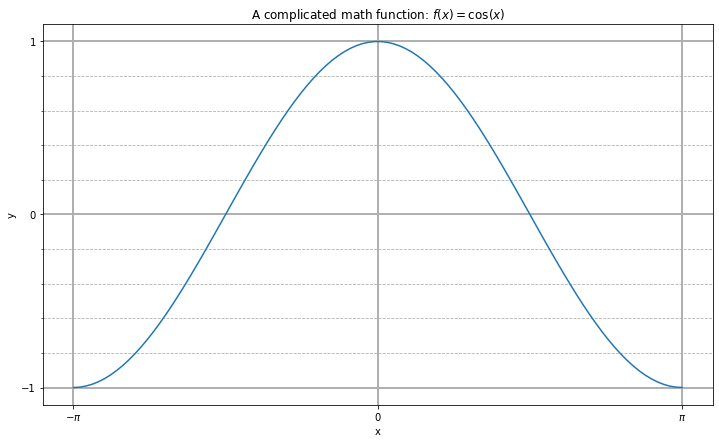

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'A complicated math function: $f(x) = \cos(x)$')

ax.set_xticks(np.pi * np.array([-1, 0, 1]))
ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_yticks([-1, 0, 1])

ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
#ax.set_xticks(np.arange(-3, 3.1, 0.2), minor=True)

ax.grid(which='minor', linestyle='--')
ax.grid(which='major', linewidth=2)

## Axis Limits

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, x, z)
ax.set_xlim(-5, 5)
ax.set_ylim(-3, 3)

## Text Annotations

Text(0, 0, 'the maximum')

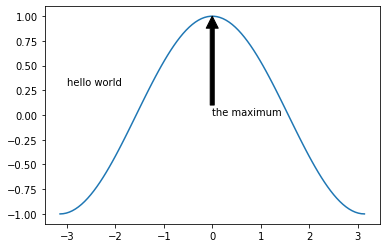

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.text(-3, 0.3, 'hello world')
ax.annotate('the maximum', xy=(0, 1),
             xytext=(0, 0), arrowprops={'facecolor': 'k'})

# Other 1D Plots

<a name="Scatter"></a>
## Scatter Plots

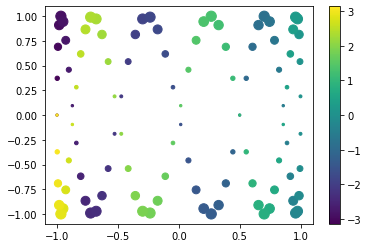

In [ ]:
fig, ax = plt.subplots()

splot = ax.scatter(y, z, c=x, s=(100*z**2 + 5))
fig.colorbar(splot)

## Bar Plots

<BarContainer object of 3 artists>

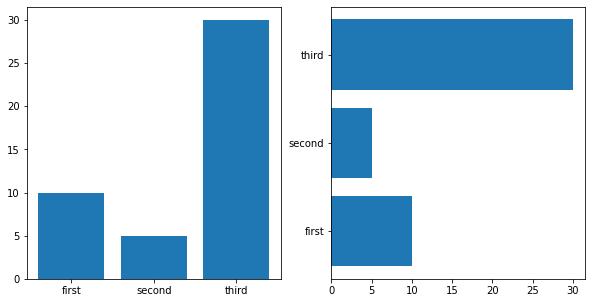

In [ ]:
labels = ['first', 'second', 'third']
values = [10, 5, 30]

fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
axes[0].bar(labels, values)
axes[1].barh(labels, values)

<a name="2D_Plotting_Methods"></a>
# 2D Plotting Methods

## imshow

In [ ]:
x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)
print(f.shape)

(50, 100)


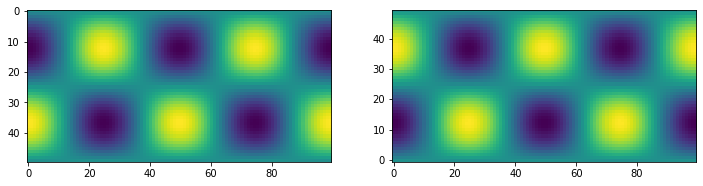

In [ ]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].imshow(f)
ax[1].imshow(f, origin='bottom')

## pcolormesh

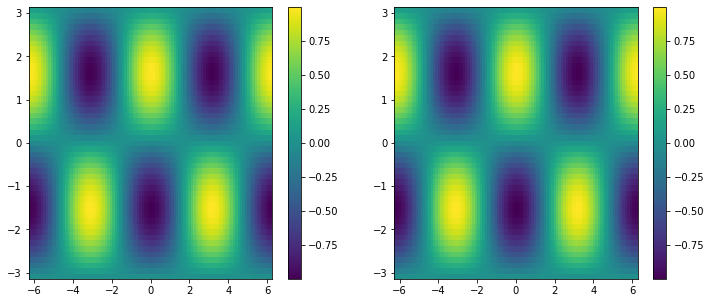

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
pc0 = ax[0].pcolormesh(x1d, y1d, f)
pc1 = ax[1].pcolormesh(xx, yy, f)
fig.colorbar(pc0, ax=ax[0])
fig.colorbar(pc1, ax=ax[1])

In [ ]:
x_sm, y_sm, f_sm = xx[:10, :10], yy[:10, :10], f[:10, :10]

fig, ax = plt.subplots(figsize=(12,5), ncols=2)

# last row and column ignored!
ax[0].pcolormesh(x_sm, y_sm, f_sm, edgecolors='k')

# same!
ax[1].pcolormesh(x_sm, y_sm, f_sm[:-1, :-1], edgecolors='k')

In [ ]:
y_distorted = y_sm*(1 + 0.1*np.cos(6*x_sm))

plt.figure(figsize=(12,6))
plt.pcolormesh(x_sm, y_distorted, f_sm[:-1, :-1], edgecolors='w')
plt.scatter(x_sm, y_distorted, c='k')

NameError: ignored

## contour / contourf

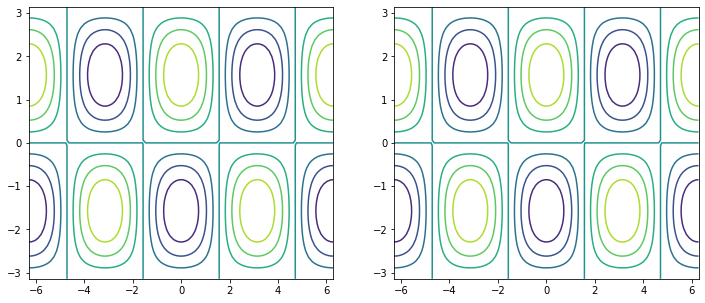

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

# same thing!
ax[0].contour(x1d, y1d, f)
ax[1].contour(xx, yy, f)

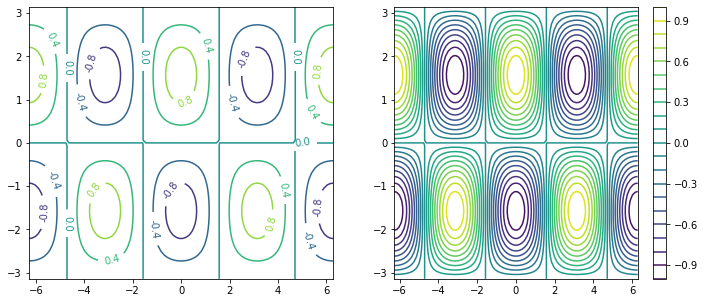

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

c0 = ax[0].contour(xx, yy, f, 5)
c1 = ax[1].contour(xx, yy, f, 20)

plt.clabel(c0, fmt='%2.1f')
plt.colorbar(c1, ax=ax[1])

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

clevels = np.arange(-1, 1, 0.2) + 0.1

cf0 = ax[0].contourf(xx, yy, f, clevels, cmap='RdBu_r', extend='both')
cf1 = ax[1].contourf(xx, yy, f, clevels, cmap='inferno', extend='both')

fig.colorbar(cf0, ax=ax[0])
fig.colorbar(cf1, ax=ax[1])

## quiver

NameError: ignored

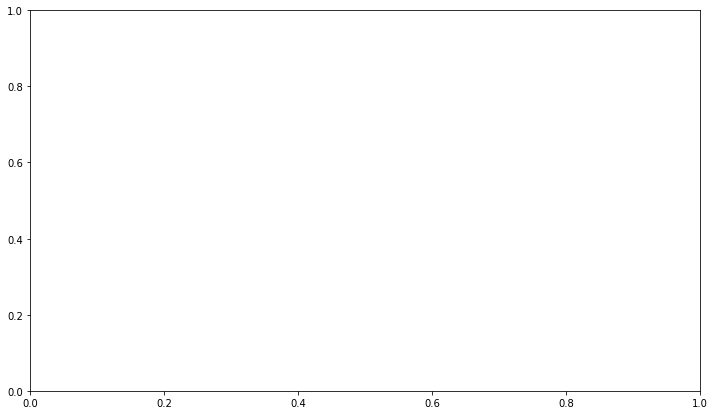

In [ ]:
u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)

fig, ax = plt.subplots(figsize=(12, 7))
ax.contour(xx, yy, f, clevels, cmap='RdBu_r', extend='both', zorder=0)
ax.quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)

## streamplot

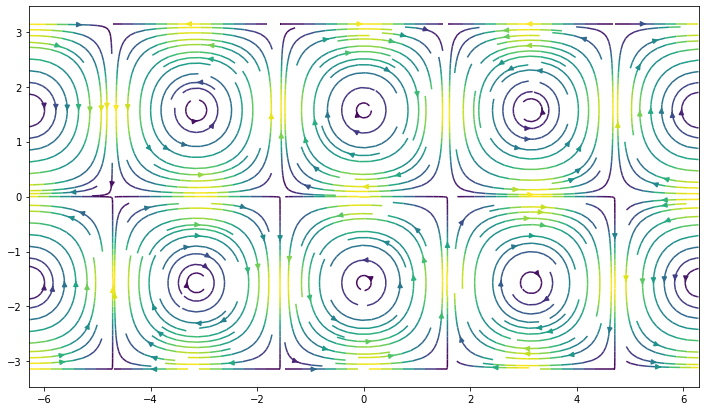

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))

# Exercise 3: Replicating Plots using `Matplotlib` and `Numpy`

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. There is no need to focus on how this code exactly works. In the end, it will give you some `numpy` arrays, which you will use in your plots. 

This exercise should be done using **only `numpy` and `matplotlib`**.

## Part I: Line and Contour Plots to Visualize Global Temperature Data

The temperature data are from the [NCEP/NCAR atmospheric reanalysis 1](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html).

In [ ]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS
#### (numpy arrays) 
#### NO XARRAY ALLOWED :)
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

Below is the figure to replicate using the `numpy` variables `temp`, `lon`, and `lat`.

Hint 1: Zonal-mean is synonymous with longitudinal-mean, i.e. the mean must be taken along the `axis` corresponding to `lon`.

Hint 2: To create subplots of different sizes, consider reading the [`plt.subplots` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

Hint 3: For the left subplot, check out the [2D Plotting Methods section](#2D_Plotting_Methods).

Hint 4: For the right subplot, check out the [Label, Ticks, and Gridlines subsection](#Label).

Hint 5: Don't spend too too much time making your figure perfect as there is still a lot of ground to cover in the next notebooks 😀

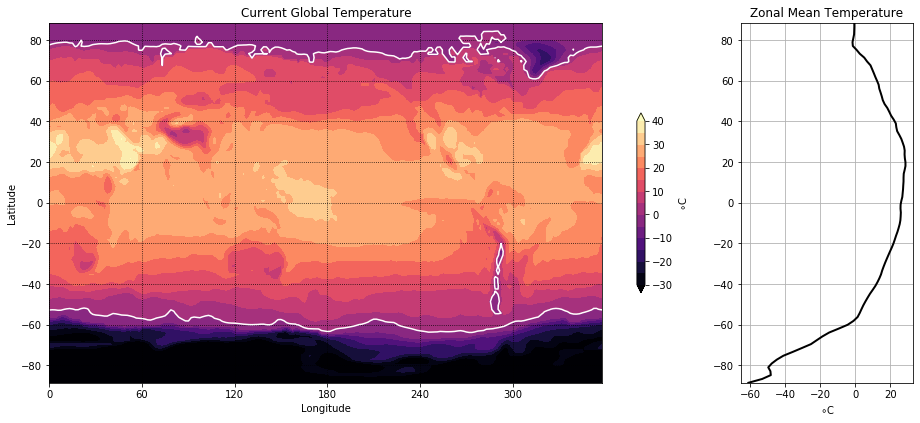

Text(0.5, 1.0, 'Zonal Mean Temperature')

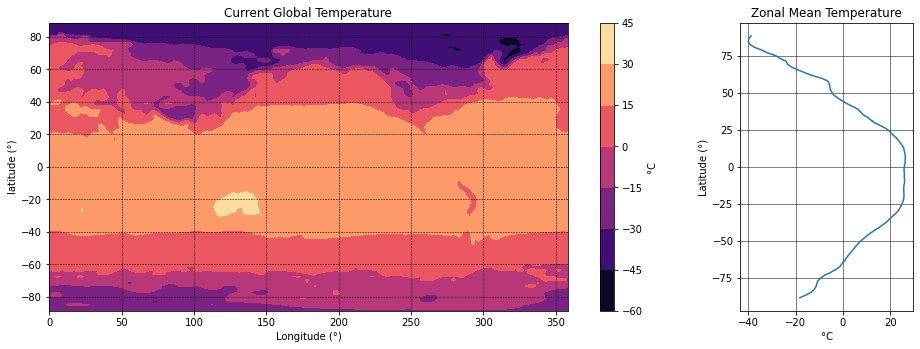

In [ ]:
# Replicate the figure here
from matplotlib import cm
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=2)

ax[0] = fig.add_axes([0, 0, 1.5, 1])
ax[1] = fig.add_axes([1.6, 0, 0.4, 1])

pc0 = ax[0].contourf(lon, lat, temp,cmap=cm.magma)
ax[0].grid(linewidth=0.5, color='k', linestyle='--')
cbar = fig.colorbar(pc0, ax=ax[0])
cbar.set_label('°C')
ax[0].set_xlabel('Longitude (°)')
ax[0].set_ylabel('latitude (°)')
ax[0].set_title('Current Global Temperature')

tempMean = np.nanmean(temp, axis=1)

ax[1].plot(tempMean,lat);
ax[1].grid(linewidth=0.5, color='k')
ax[1].set_xlabel('°C')
ax[1].set_ylabel('Latitude (°)')
ax[1].set_title('Zonal Mean Temperature')

## Part II: Scatter Plots to Visualize Earthquake Data

Here, we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by `log10(depth)` and adjust the marker size to be `magnitude/100`

In [ ]:
import pooch

In [ ]:
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg?download=1",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of '/root/.cache/pooch/64acbefd890a7bfdd423ac258fbaa5dc-EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg' to '/root/.cache/pooch/64acbefd890a7bfdd423ac258fbaa5dc-EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg.unzip'


Below is the figure to replicate using the `numpy` variables `earthquake`, `depth`, `magnitude`, `latitude`, and `longitude`.

Hint: Check out the [Scatter Plots subsection](#Scatter) and consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html). 

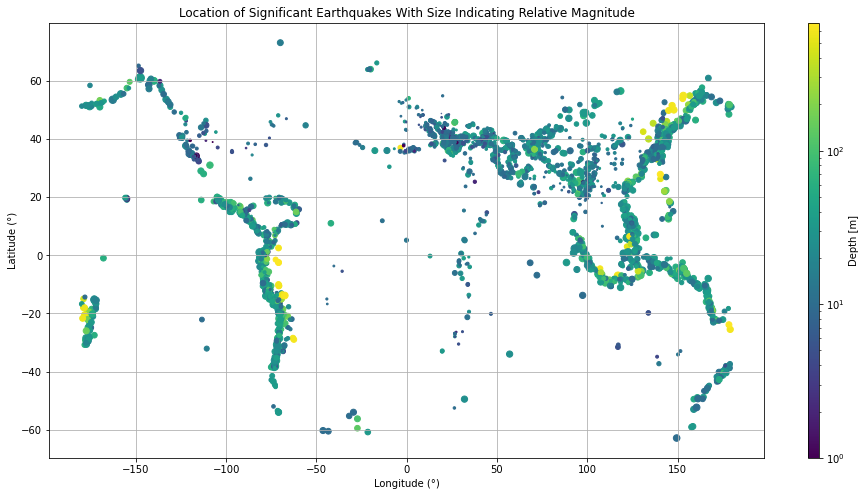

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5, 1.0, 'Location of significant earthquake with size indicating and relative magnitude')

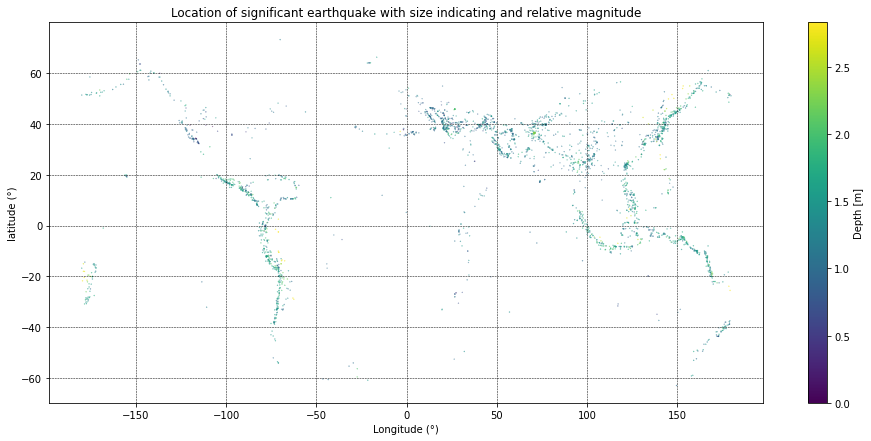

In [ ]:
# Replicate the figure here
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,7))

splot = ax.scatter(longitude,latitude, c = np.log10(depth), s=magnitude/100)
ax.grid(linewidth=0.5, color='black',linestyle='--')
cbar = fig.colorbar(splot)
cbar.set_label('Depth [m]')
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('latitude (°)')
ax.set_title('Location of significant earthquake with size indicating and relative magnitude')
